# [ICTCOG AI Academy] 7기 고급시각저녁반
# Object Detection (1) - Two Stage 기법 (2)
- Object Detection = localization + classification

### 2-stage approaches
- 느림


- R-CNN
  - localization을 전통적인 Region Proposals 기반인 selective search를 이용
    - 4가지 유사도 기반으로 hieralchial grouping
  - 이미지를 resize ( 이미지 왜곡)
- SPPnet
  - selective search
  - Spatial Pyramid Pooling 으로 resize 불필요
    - selective search 통해 나온 이미지를 Convolution feature map에 대응

- Fast R-CNN
- Faster R-CNN

- Mask R-CNN
  - segmentation

### Fast R-CNN
- R-CNN의 저자, Fast R-CNN 단독 저자
- R-CNN 의 느린속도를 개선
- VGG16기반 
  - 모델구조가 단순해서 fine-tuning 에 적합
- RoI(Region of Interest) Pooling 
  - SPP처럼 피라미드 쌓아서 하지 않고 한 번만 사용
  - underfitting, overfitting 동시에 걸림
  - Bounding Box regressor 
- loss function : multi ouputs을 위해서 multi-task loss 이어야함
> fast-rcnn.pdf 참고




In [ ]:
import tensorflow as tf

범용적이지 않거나 구현 쉬우면 제공되지 않음

In [ ]:
tf.keras.layers #ROI pooling 없음

### 커스터마이징
- 상속 통한 callback 

In [ ]:
tf.keras.callbacks.Callback.on_epoch_begin

In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_begin(self, epoch, logs=None):
    pass


### [Custom Layers](https://www.tensorflow.org/tutorials/customization/custom_layers)
- **모든 레이어는 함수형**
- **모델은 레이어들의 집합**

- `tf.keras.layers.Layer` 상속을 통해서 커스텀

- `__init__, build, call` 3총사
  - __init__ 레이어에 필요한 매개변수 입력 받음
  - call : 함수형 패러다임처럼 `()` 사용하기 위해   
    - > call() -> `build, __call__` 부름
  - build :
    - 모델
      - input_shape/ shape 이 지정되어 있는경우 built= True
      - input_shape이 지정되지 않은 경우 첫번째 실행된 값으로 shape 정해지면서 built= True
    - 레이어 
      - input_shape이 지정되지 않은 경우 첫번째 실행된 값으로 shape 정해지면서 built= True


- SPP 참고 : https://github.com/yhenon/keras-spp/blob/master/spp/SpatialPyramidPooling.py


In [ ]:
class MyLayer(tf.keras.layers.Layer): #상속
  pass

In [ ]:
class T:
  def __call__(self):
    pass

In [ ]:
t=T()

In [ ]:
t()

input_shape 이 정의되어 있지 않으면 처음 입력받은 데이터 기반으로 building 됨


In [ ]:
x=tf.keras.layers.Dense(2)

In [ ]:
x.built #입력 받기 이전 built=False

False

In [ ]:
a= tf.constant( [[1,2,],[3,4]] )

In [ ]:
x(a)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.39651227, -0.32186437],
       [ 0.25691867, -0.7692189 ]], dtype=float32)>

In [ ]:
b=tf.constant([[1]]) 

In [ ]:
x(b)

ValueError: ignored

In [ ]:
x.built # 입력 받은 이후 built=True

True

In [ ]:
b.shape

TensorShape([1, 1])

In [ ]:
layer=tf.keras.layers.Dense(2, input_shape=(None,5))
layer.built

False

In [ ]:
layer(b)

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-0.8832489 ,  0.03792346]], dtype=float32)>

In [ ]:
layer.built

True

In [ ]:
layer=tf.keras.layers.Dense(2, input_shape=(1,5))
layer.built

False

In [ ]:
m=tf.keras.models.Sequential([
                            tf.keras.layers.Dense(10)
])

In [ ]:
m.summary() #input_shape 지정되지 않는경우 에러 

ValueError: ignored

In [ ]:
m(b) #built=True가 되어 summary 나옴

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[ 0.4296134 ,  0.23057926,  0.6236277 ,  0.6860159 , -0.5975666 ,
         0.6068335 ,  0.20345777,  0.7067545 ,  0.2814986 , -0.35782337]],
      dtype=float32)>

In [ ]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (1, 10)                   20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [ ]:
m=tf.keras.models.Sequential([
                            tf.keras.layers.Dense(10,input_shape=(1,5))
                          
])

In [ ]:
m.built #input_shpe 지정되면 built=True

True

In [ ]:
m.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1, 10)             60        
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


call 
- 정방향 연산을 하기 때문에 input 필요

In [ ]:
class MyLayer(tf.keras.layers.Layer):
  def __init__(self):
    super().__init__(self)
    print('init')
  def build(self):
    print('build')
  def call(self):
    print('call')
    return tf.zeros(10)  #리턴 필요

In [ ]:
layer=MyLayer()

init


In [ ]:
class MyLayer(tf.keras.layers.Layer):
  def __init__(self):
    super().__init__(self)
    print('init')
  def build(self,input_shape):     #built 인지 아닌지 check
    print('build')
  def call(self,input):
    print('call')
    #return tf.matmul(input,input)  #리턴 필요하나 기본 return None

call 실행전 내부에 build 불러서 초기화 시킴

In [ ]:
layer=MyLayer() 

init


In [ ]:
a=tf.constant([[1,2],[3,4]])

In [ ]:
layer(a) #내부적으로 build, call 함께 불림

build
call


- 학습되어 있는 모델 :https://modelzoo.co/
- 학습되어 있지 않은 모델: https://paperswithcode.com/sota

In [ ]:
import tensorflow as tf

In [ ]:
class SpartialPyramidPooling(tf.keras.layers.Layer):
  def __init__(self, pool_list, *args, **kwarg):
    super().__init__(pool_list, *args, **kwarg)
    self.pool_list=pool_list

  def build(self,input_shape):
    pass
  def call(self,input_):
    print(input_.shape)          #input 에 대한 shape 받아서 pooling 이용해서 
    print(tf.reduce_max(input_)) #input 값들에 대한 최대값 
    return  tf.reduce_max(input_)

In [ ]:
layer=SpartialPyramidPooling([1,2,4]) #등분

input shape을 알아야 등분함

In [ ]:
layer(tf.range(24)) 

(24,)
tf.Tensor(23, shape=(), dtype=int32)


<tf.Tensor: shape=(), dtype=int32, numpy=23>

In [ ]:
tf.maximum(tf.constant([1,2,3,4]))

TypeError: ignored

In [ ]:
tf.reduce_max(tf.constant([1,2,3,4]))  #

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [ ]:
class SpartialPyramidPooling(tf.keras.layers.Layer):
  def __init__(self, pool_list, *args, **kwarg):
    super().__init__(pool_list, *args, **kwarg)
    self.pool_list=pool_list

  def build(self,input_shape):
    pass
  def compute_output_shape(self,input_shape):
    print(input_shape)
  def call(self,input_):
    for i in self.pool_list:
      print(input_.shape)          #input 에 대한 shape 받아서 pooling 이용해서 
      print(tf.reduce_max(input_)) #input 값들에 대한 최대값 
    return  tf.reduce_max(input_)

In [ ]:
layer=SpartialPyramidPooling([1,2,4]) #등분

In [ ]:
layer(tf.range(24))

(24,)
tf.Tensor(23, shape=(), dtype=int32)


<tf.Tensor: shape=(), dtype=int32, numpy=23>

helper class 
계산 용이

In [ ]:
tf.keras.layers.Layer.compute_output_shape #레이어 build 불러와서 output shape 계산 

### Faster R-CNN
- selective search 사용하는 대신에 학습을 통해서 Region Proposals 예측
  -  selective search는 bottleneck 일으킴
- end-to-end model 
- Region Proposal Network (RPN) : 컨볼루션 특징을 이용해서 물체가 있을 만한 영역 제안 
    - > ZFnet 시각화 :컨볼루션 결과에서 가장 크게 활성화 된 곳에 객체가 있음 
    -  anchors : 미리 정해진 비율, 형태 별로 9개 형태의 박스로 크기에 상관없이 탐지 
    - classifier (클래스인지 아닌지) 2x9 
    - bounding box regressor  4개 좌표x9 
     - 1x1 convolution :차원 축소
    - padding  1 추가하는 중간 레이어 추가
- multi-task loss
- 학습 :  RPN classifier, regressor , 마지막 classifier & regressor (4개 losses 사용)
    - VGG 16 기반( 간단한 모델 구조라서 fine-tuning 하기 좋음)



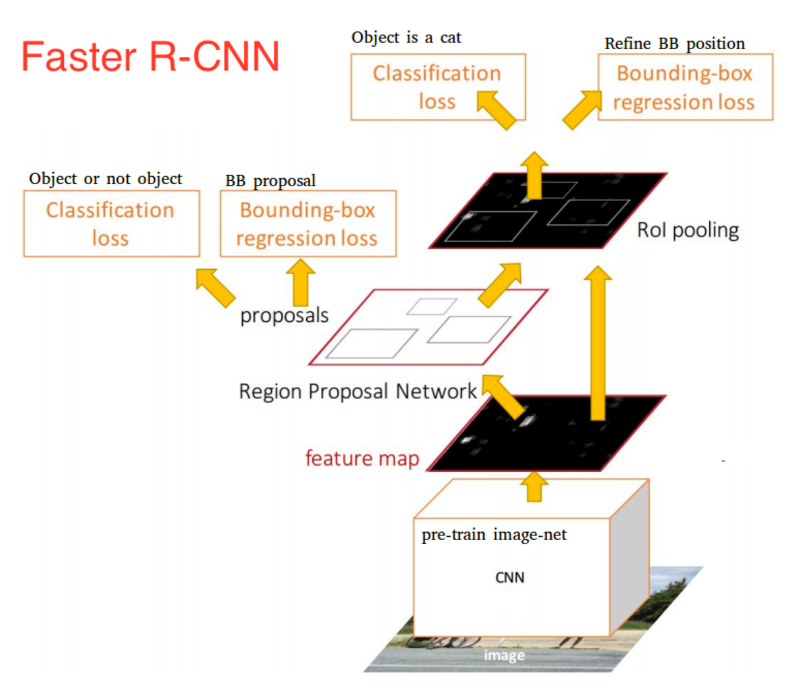